# MNIST MLP models

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

res = pd.read_csv('results/one.csv', index_col=0, usecols=[0,2,3,4,5,6])
res.head()

,epoch,loss,val_loss,accuracy,val_accuracy
0,1,0.4848,0.2221,0.8552,0.9362
1,2,0.3286,0.1908,0.9028,0.9445
2,3,0.2593,0.1679,0.9238,0.9509
3,4,0.2178,0.1527,0.9365,0.9551
4,5,0.1892,0.1415,0.9450,0.9581


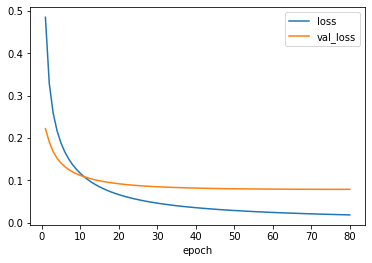

In [8]:
res.plot(x='epoch', y=['loss', 'val_loss'])
plt.show()


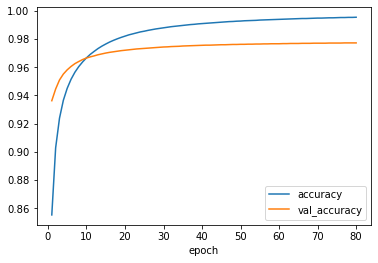

In [9]:
res.plot(x='epoch', y=['accuracy', 'val_accuracy'])
plt.show()

In [10]:
import helpers.mnist_loader as mld
import helpers.evaluation as e
from models.MLP import MLPOne

t_set, v_set, hb_set = mld.loadMNISTDatasets()
_,_, hb_loader = mld.getMNISTLoaders([t_set, v_set, hb_set], batch_size=32)

mlp = e.loadModel(modelClass=MLPOne(),   name="MLPOne")
mlp

MLPOne(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (fc2): Linear(in_features=392, out_features=10, bias=True)
)

In [11]:
from torch.nn.functional import cross_entropy

e.validate(mlp, cross_entropy, hb_loader);


HoldBackSet: Avg. loss: 0.0021, Accuracy: 0.9819 (98.2%)



### Playing with parameters

Using our `TrainingGuider`, we can easily play with the hyperparamters. We added a _ReLu_ activation function to the model too, the `MLPZeroReLu`.

We have explored:

- Training rate: 0.01, 0.05, 0.1
- Batch size: 32, 64

We reduced the number of epochs to 40, since the gain from more was negligeable and we also care for the planet.


In [7]:
res = pd.read_csv('./results/mlp_zero_params.csv', index_col=0)
res.head()

,case,epoch,loss,val_loss,accuracy,val_accuracy,learning_rate,batch_size,optimizer,model
0,1,1,0.4271,0.3248,0.8810,0.9073,0.01,32,sgd,MLPZero
1,1,2,0.3733,0.3145,0.8948,0.9101,0.01,32,sgd,MLPZero
2,1,3,0.3495,0.3072,0.9013,0.9129,0.01,32,sgd,MLPZero
3,1,4,0.3352,0.3025,0.9054,0.9141,0.01,32,sgd,MLPZero
4,1,5,0.3254,0.2995,0.9083,0.9147,0.01,32,sgd,MLPZero


In [15]:
subres = res[(res.case == 7) | (res.case == 1)]

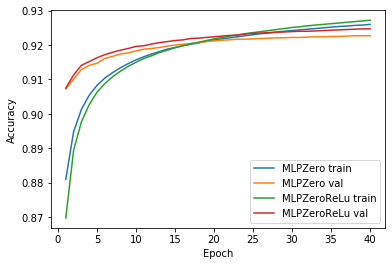

In [19]:
mz = subres[(subres.model == 'MLPZero')]
mzr = subres[(subres.model == 'MLPZeroReLu')]
x =  mz.epoch
# plotting the line 1 points 
plt.plot(x, mz.accuracy, label = "MLPZero train")
plt.plot(x, mz.val_accuracy, label = "MLPZero val")
plt.plot(x, mzr.accuracy, label = "MLPZeroReLu train")
plt.plot(x, mzr.val_accuracy, label = "MLPZeroReLu val")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

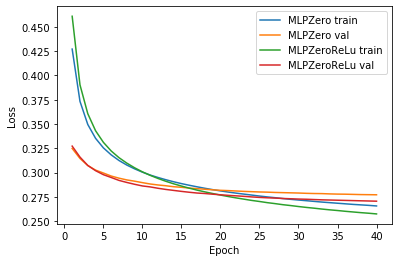

In [21]:
plt.plot(x, mz.loss, label = "MLPZero train")
plt.plot(x, mz.val_loss, label = "MLPZero val")
plt.plot(x, mzr.loss, label = "MLPZeroReLu train")
plt.plot(x, mzr.val_loss, label = "MLPZeroReLu val")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [ ]:
subres = res[(res.case == 1) | (res.case == 2)]

## MLPTwo

![MLPTwo](./report/mlp_two/architectureTwo.png)

In [1]:
res = pd.read_csv('results/two.csv', index_col=0, usecols=[0,2,3,4,5,6])
res.head()

NameError: name 'pd' is not defined